In [1]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def resize(img,max_height,max_width):
    import cv2 as cv    
    img = cv.resize(img,(max_height,max_width), interpolation= cv.INTER_AREA)
    return img

In [3]:
matriz_vacia =  np.matrix(np.empty(shape=(85265)))
con=0
cont=0
for i in range (223):
    img=cv.imread(str(i+1)+".jpg",0)
    #img = resize(img,1000,750)
    img = resize(img,292,292)
    img=np.insert(img.reshape(85264),0,cont,axis=0)
    con=con+1
    if con==4:
        cont=cont+1
        con=0
    matriz_vacia=np.insert(matriz_vacia,i,img,axis=0)
dframe= pd.DataFrame(matriz_vacia)
dframe.to_csv("dataset.csv",header=None,index = None)



In [4]:
dataframe = pd.read_csv("dataset.csv",header=None).values.astype(float)


In [5]:
print(dataframe.shape)
X_data=dataframe[:,1:85265]
X_label=dataframe[0,1:52]
print(X_label.shape)
print(int(X_label[4]))


(224, 85265)
(51,)
225


[68, 62, 102, 61, 90]


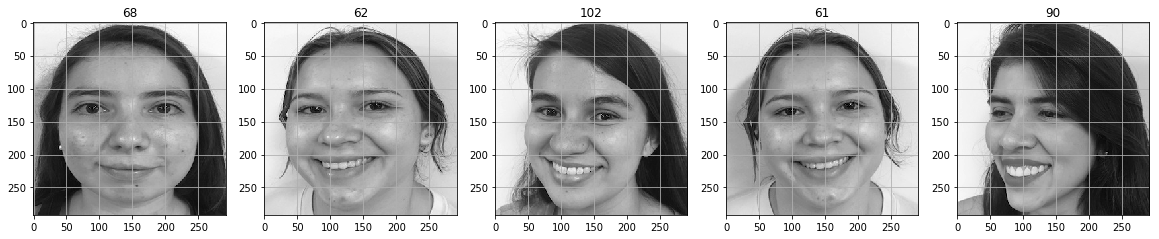

In [6]:
fig = plt.figure(figsize=(20,20))
vector=[]
fig.add_subplot(151); plt.grid(); 
a=np.random.randint(53,103)
vector.append(a)
plt.imshow(X_data[a].reshape(292,292),"gray");
plt.title(a)
fig.add_subplot(152); plt.grid()
b=np.random.randint(53,103)
vector.append(b)
plt.imshow(X_data[b].reshape(292,292),"gray");
plt.title(b)
fig.add_subplot(153); plt.grid()
c=np.random.randint(53,103)
vector.append(c)
plt.imshow(X_data[c].reshape(292,292),"gray");
plt.title(c)
fig.add_subplot(154); plt.grid()
d=np.random.randint(53,103)
vector.append(d)
plt.imshow(X_data[d].reshape(292,292),"gray");
plt.title(d)
fig.add_subplot(155); plt.grid()
e=np.random.randint(53,103)
vector.append(e)
plt.imshow(X_data[e].reshape(292,292),"gray");
plt.title(e)
print(vector)


In [7]:
choose=[]
print("ingresa los indices de las mujeres que te parecen atractivas")
for i in range(2):
    choose.append(int(input()))


ingresa los indices de las mujeres que te parecen atractivas
90
102


In [8]:
d=dataframe[0:52,1:85265]
c=dataframe[0:52,0]

In [9]:
from sklearn.model_selection import train_test_split
test_size = 0.3

d_train,d_test,c_train,c_test = train_test_split(d,c,test_size=test_size)
print d_train.shape, d_test.shape
print c_train.shape, c_test.shape

(36, 85264) (16, 85264)
(36,) (16,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
g = RandomForestClassifier()
g.fit(d_train, c_train)
print "acierto en train", g.score(d_train, c_train)
print "acierto en test ", g.score(d_test, c_test)

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

acierto en train 1.0
acierto en test  0.25


In [13]:
print(X_data[e].shape)
s=X_data[choose[0]].reshape(1,-1)
print(s.shape)


(85264,)
(1, 85264)


In [14]:
result=int(g.predict(s)*4)


In [15]:
plt.imshow(X_data[result].reshape(292,292),"gray");

In [16]:
print(X_data[e].shape)
s=X_data[choose[1]].reshape(1,-1)
print(s.shape)



(85264,)
(1, 85264)


In [17]:
result=int(g.predict(s)*4)

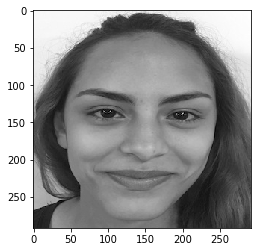

In [18]:
plt.imshow(X_data[result].reshape(292,292),"gray");